<a href="https://colab.research.google.com/github/kl2217/finite-element/blob/main/convex_optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Minimize a convex optimization problem using Newton's method

This code demonstrates the application of Newton's method to find the minimum of a convex function. Newton's method is an iterative optimization algorithm that utilizes the function's gradient and Hessian matrix to update its estimate of the minimum.

**Mathematical Representation**

Let's represent the function, its derivatives, and Newton's method formula using  `ω` (omega) as the variable:

**Loss Function (f(ω))**

$$
f(ω) = ω^2 + 2ω + 1
$$

**First Derivative (df(ω))**

$$
df(ω) = \frac{d}{dω} f(ω) = 2ω + 2
$$

**Second Derivative (d2f(ω))**

$$
d2f(ω) = \frac{d^2}{dω^2} f(ω) = 2
$$

**Newton's Method Formula**

$$
ω_{t+1} = ω_t - \frac{df(ω_t)}{d2f(ω_t)}
$$


**Convex Optimization with Newton's Method**

In convex optimization, Newton's method excels due to its quadratic convergence rate, meaning it can rapidly approach the minimum when starting from a reasonable initial guess. It leverages the curvature information provided by the Hessian matrix to take more informed steps towards the minimum.

**Limitations**

Despite its strengths, Newton's method has some limitations:

* **Hessian Calculation:** Computing the Hessian matrix can be computationally expensive, especially for high-dimensional problems.
* **Non-Convex Functions:** It may not converge or converge to a local minimum for non-convex functions.
* **Saddle Points:** It can get stuck at saddle points where the gradient is zero but the Hessian is not positive definite.

In [18]:
# Minimize a convex optimization problem using Newton's method

import numpy as np

def f(x):
  """
  Objective function to minimize.
  """
  return x**2 + 2*x + 1

def df(x):
  """
  First derivative of the objective function.
  """
  return 2*x + 2

def d2f(x):
  """
  Second derivative of the objective function.
  """
  return 2

def newtons_method(x0, tolerance=1e-6, max_iterations=100):
  """
  Minimizes a convex function using Newton's method.

  Args:
    x0: Initial guess for the minimum.
    tolerance: Convergence tolerance.
    max_iterations: Maximum number of iterations.

  Returns:
    A tuple containing:
      - The approximate minimum.
      - The number of iterations performed.
  """
  x = x0
  for i in range(max_iterations):
    delta_x = -df(x) / d2f(x)  # Newton's update rule
    x = x + delta_x
    if abs(delta_x) < tolerance:
      return x, i + 1

  return x, max_iterations # Return after max iteration if it doesn't converge

# Example usage:
initial_guess = 10  # An example starting point
minimum, iterations = newtons_method(initial_guess)

print(f"Approximate minimum: {minimum}")
print(f"Number of iterations: {iterations}")
print(f"Function value at minimum: {f(minimum)}")



Approximate minimum: -1.0
Number of iterations: 2
Function value at minimum: 0.0


# In multiple dimensions

**Loss Function (f(ω))**

$$
f(ω) = 100(ω_2 - ω_1^2)^2 + (1 - ω_1)^2
$$

**Gradient (∇f(ω))**

$$
∇f(ω) = \begin{bmatrix}
-400ω_1(ω_2 - ω_1^2) - 2(1 - ω_1) \\
200(ω_2 - ω_1^2)
\end{bmatrix}
$$

**Hessian (H(ω))**

$$
H(ω) = \begin{bmatrix}
-400(ω_2 - 3ω_1^2) + 2 & -400ω_1 \\
-400ω_1 & 200
\end{bmatrix}
$$

**Newton's Method Formula (Matrix Form)**

$$
ω_{t+1} = ω_t - [H(ω_t)]^{-1}∇f(ω_t)
$$

$$ ∇f(x) = \begin{bmatrix} \frac{\partial f}{\partial x_1} \\ \frac{\partial f}{\partial x_2} \\ \vdots \\ \frac{\partial f}{\partial x_n} \end{bmatrix} $$

Explanation:

∇f(x): Represents the gradient of the function 'f' at a point 'x'.

x₁, x₂, ..., xₙ: Are the input variables of the function 'f'.

∂f/∂xᵢ: Represents the first-order partial derivative of the function 'f' with respect to variable 'xᵢ'.

The gradient is a vector that points in the direction of the greatest rate of increase of the function. Its components represent the slopes of the function in each direction of the input variables.

$$ H(f) = \begin{bmatrix} \frac{\partial^2 f}{\partial x_1^2} & \frac{\partial^2 f}{\partial x_1 \partial x_2} & \cdots & \frac{\partial^2 f}{\partial x_1 \partial x_n} \\ \frac{\partial^2 f}{\partial x_2 \partial x_1} & \frac{\partial^2 f}{\partial x_2^2} & \cdots & \frac{\partial^2 f}{\partial x_2 \partial x_n} \\ \vdots & \vdots & \ddots & \vdots \\ \frac{\partial^2 f}{\partial x_n \partial x_1} & \frac{\partial^2 f}{\partial x_n \partial x_2} & \cdots & \frac{\partial^2 f}{\partial x_n^2} \end{bmatrix} $$

Explanation:

H(f): Represents the Hessian matrix of a function 'f'.

x₁, x₂, ..., xₙ: Are the input variables of the function 'f'.

∂²f/∂xᵢ∂xⱼ: Represents the second-order partial derivative of the function 'f' with respect to variable 'xᵢ' and then with respect to variable 'xⱼ'.


The Hessian matrix is a square matrix that contains all the second-order partial derivatives of a multivariable function. Each element in the matrix represents how the rate of change of one partial derivative (slope in one direction) is affected by a change in another variable. It essentially captures the curvature of the function's surface.

In [19]:
import numpy as np

# Minimize a multi-dimensional convex optimization problem using Newton's method

def f(x):
    """
    Objective function to minimize (example: Rosenbrock function).
    """
    return 100 * (x[1] - x[0]**2)**2 + (1 - x[0])**2

def df(x):
    """
    Gradient of the objective function.
    """
    grad = np.zeros(2)
    grad[0] = -400 * x[0] * (x[1] - x[0]**2) - 2 * (1 - x[0])
    grad[1] = 200 * (x[1] - x[0]**2)
    return grad

def d2f(x):
    """
    Hessian matrix of the objective function.
    """
    hessian = np.zeros((2, 2))
    hessian[0, 0] = -400 * (x[1] - 3 * x[0]**2) + 2
    hessian[0, 1] = -400 * x[0]
    hessian[1, 0] = -400 * x[0]
    hessian[1, 1] = 200
    return hessian

def newtons_method(x0, tolerance=1e-6, max_iterations=100):
    """
    Minimizes a multi-dimensional convex function using Newton's method.
    Imagine you're standing on a hillside and want to find the lowest point (the minimum).
    The gradient tells you the direction of the steepest uphill climb.
    The Hessian gives you information about the shape of the hill.
    This line of code essentially calculates the direction
    and distance you should move to go downhill most efficiently,
    taking into account the slope and curvature of the hill.
    This movement is stored in delta_x. This process is iteratively repeated,
    leading us to the valley, i.e., the minimum.
    """
    x = x0
    for i in range(max_iterations):
        # Solve the linear equations: Hessian_matrix * delta_x = -gradient
        delta_x = -np.linalg.solve(d2f(x), df(x))
        x = x + delta_x
        #magnitude or length of the delta_x vector is small enough
        if np.linalg.norm(delta_x) < tolerance:
            return x, i + 1
    return x, max_iterations

# Example usage:
initial_guess = np.array([-1.2, 1])
minimum, iterations = newtons_method(initial_guess)

print(f"Approximate minimum: {minimum}")
print(f"Number of iterations: {iterations}")
print(f"Function value at minimum: {f(minimum)}")

Approximate minimum: [1. 1.]
Number of iterations: 7
Function value at minimum: 0.0


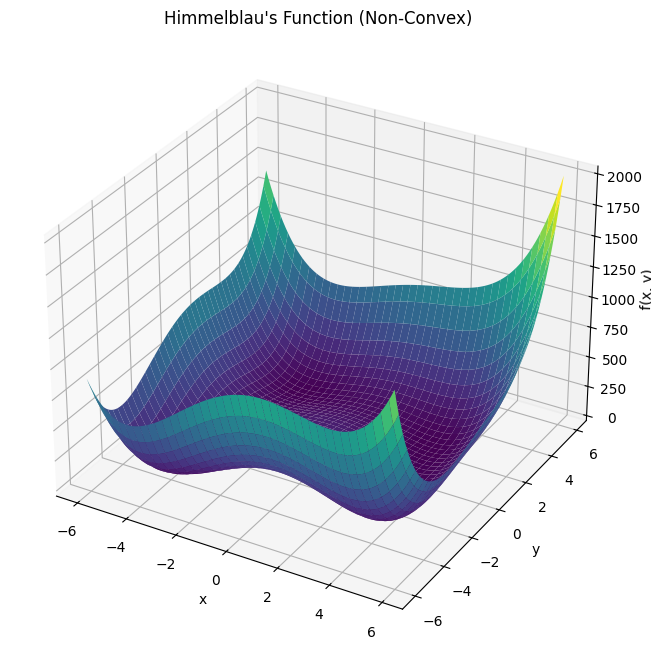

In [20]:
# 2d surface that can not be solved with convex optimization

import matplotlib.pyplot as plt
import numpy as np

# Define the non-convex function (e.g., Himmelblau's function)
def himmelblau(x, y):
    return (x**2 + y - 11)**2 + (x + y**2 - 7)**2

# Create a grid of x and y values
x = np.arange(-6, 6, 0.1)
y = np.arange(-6, 6, 0.1)
X, Y = np.meshgrid(x, y)

# Calculate the function values for each point in the grid
Z = himmelblau(X, Y)


# Create a 3D surface plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')  # Use a colormap for better visualization

# Add labels and title
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
ax.set_title("Himmelblau's Function (Non-Convex)")

# Show the plot
plt.show()


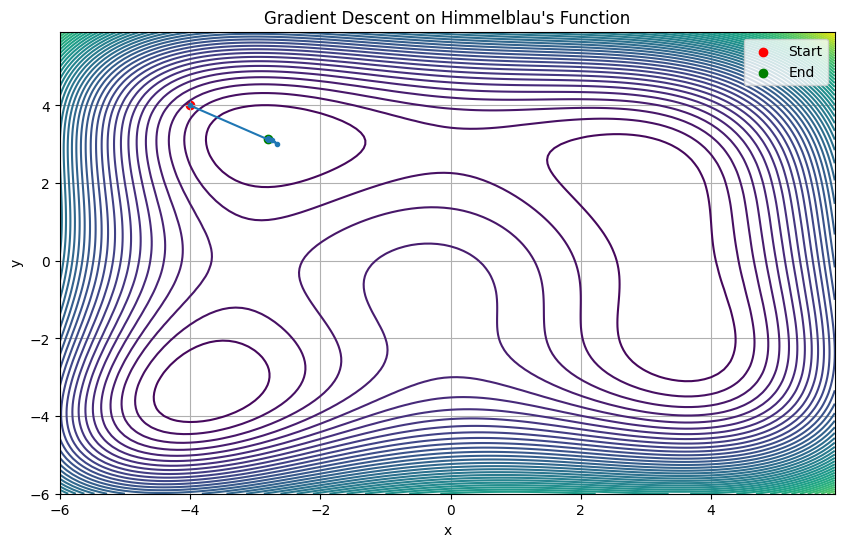

Final Point: [-2.80511809  3.13131252]
Himmelblau's value at final point: 7.888609052210118e-31


In [21]:
# Use gradient descent to optimize non-convex optimization problems

import numpy as np
import matplotlib.pyplot as plt

# Define the Himmelblau's function (a non-convex function)
def himmelblau(x):
    return (x[0]**2 + x[1] - 11)**2 + (x[0] + x[1]**2 - 7)**2

# Gradient of Himmelblau's function
def himmelblau_gradient(x):
    grad = np.zeros(2)
    grad[0] = 4*x[0]*(x[0]**2 + x[1] - 11) + 2*(x[0] + x[1]**2 - 7)
    grad[1] = 2*(x[0]**2 + x[1] - 11) + 4*x[1]*(x[0] + x[1]**2 - 7)
    return grad

# Gradient Descent
def gradient_descent(start_point, learning_rate, iterations):
    x = np.array(start_point, dtype=float)
    history = [x.copy()]  # Store the optimization path
    for i in range(iterations):
        grad = himmelblau_gradient(x)
        x -= learning_rate * grad
        history.append(x.copy())
    return np.array(history)

# Parameters
start_point = [-4, 4] # Initial point
learning_rate = 0.01
iterations = 500

# Run Gradient Descent
optimization_path = gradient_descent(start_point, learning_rate, iterations)

# Plot the results
x = np.arange(-6, 6, 0.1)
y = np.arange(-6, 6, 0.1)
X, Y = np.meshgrid(x, y)
Z = himmelblau([X, Y])

plt.figure(figsize=(10, 6))
plt.contour(X, Y, Z, 50)  # Plot contours of the Himmelblau function
plt.plot(optimization_path[:, 0], optimization_path[:, 1], marker='o', markersize=3, linestyle='-')
plt.scatter(optimization_path[0, 0], optimization_path[0, 1], color='red', label='Start')
plt.scatter(optimization_path[-1, 0], optimization_path[-1, 1], color='green', label='End') #Final point

plt.xlabel('x')
plt.ylabel('y')
plt.title('Gradient Descent on Himmelblau\'s Function')
plt.legend()
plt.grid(True)
plt.show()


print(f"Final Point: {optimization_path[-1]}")
print(f"Himmelblau's value at final point: {himmelblau(optimization_path[-1])}")